# Section 4.7

# 13

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [2]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
Weekly = load_data('Weekly')
Weekly.head(5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [4]:
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


# 13 (a)

In [5]:
#correlation plot to observe correlation among the features
Weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


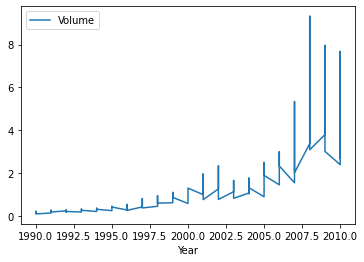

In [6]:
Weekly.plot(y='Volume',x='Year');

<AxesSubplot:>

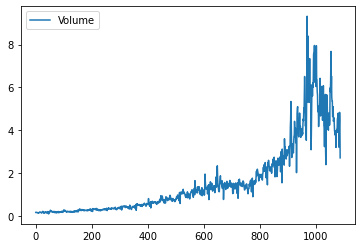

In [7]:
Weekly.plot(y='Volume')

# 13 (b)

In [8]:
predictors = Weekly.columns.drop(['Today', 'Direction', 'Year'])
design = MS(predictors)
X = design.fit_transform(Weekly)
y = Weekly.Direction == 'Up'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


# 13 (c)

In [9]:
#obtaining probability of market going up
probs = results.predict()

#creating the array with labels 
labels = np.array(['Down']*1089)
labels[probs>0.5] = "Up"

labels

array(['Up', 'Up', 'Up', ..., 'Up', 'Up', 'Up'], dtype='<U4')

In [10]:
confusion_table(labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [11]:
print("overall fraction of correct predictions=",(54+557)/(1089))

overall fraction of correct predictions= 0.5610651974288338


In [12]:
print('error rate is',100-100*np.mean(labels == Weekly.Direction))

error rate is 43.89348025711662


In [13]:
print('overall fraction of correct predictions for the label "up"=',(557)/(557+48))

overall fraction of correct predictions for the label "up"= 0.9206611570247933


In [14]:
print('overall fraction of correct predictions for the label "down"=',(54)/(54+430))

overall fraction of correct predictions for the label "down"= 0.1115702479338843


# 13 (d)

In [15]:
#using lag2 as predictor
allvars = Weekly.columns.drop(['Year', 'Lag1', 'Lag3','Lag4','Lag5','Volume','Today','Direction'])
design = MS(allvars)
X = design.fit_transform(Weekly)
y = Weekly.Direction == 'Up'

In [16]:
train_data=Weekly.loc[Weekly['Year'] <2009]
train_data.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
980,2008,12.026,-8.389,-6.198,-3.898,10.491,5.841565,-2.251,Down
981,2008,-2.251,12.026,-8.389,-6.198,-3.898,6.093950,0.418,Up
982,2008,0.418,-2.251,12.026,-8.389,-6.198,5.932454,0.926,Up
983,2008,0.926,0.418,-2.251,12.026,-8.389,5.855972,-1.698,Down
984,2008,-1.698,0.926,0.418,-2.251,12.026,3.087105,6.760,Up


In [17]:
test_data=Weekly.loc[Weekly['Year'] >2008]
test_data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
985,2009,6.760,-1.698,0.926,0.418,-2.251,3.793110,-4.448,Down
986,2009,-4.448,6.760,-1.698,0.926,0.418,5.043904,-4.518,Down
987,2009,-4.518,-4.448,6.760,-1.698,0.926,5.948758,-2.137,Down
988,2009,-2.137,-4.518,-4.448,6.760,-1.698,6.129763,-0.730,Down
989,2009,-0.730,-2.137,-4.518,-4.448,6.760,5.602004,5.173,Up


In [18]:
train = (Weekly.Year < 2009)
Weekly_train = Weekly.loc[train]
Weekly_test = Weekly.loc[~train]
Weekly_test.shape

(104, 9)

In [19]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]

In [20]:
D = Weekly.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [21]:
model = MS(['Lag2']).fit(Weekly)
X = model.transform(Weekly)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train,
                  X_train,
                  family=sm.families.Binomial())
results = glm_train.fit()

In [22]:
#confusion matrix for test data
probs = results.predict(exog=X_test)
labels = np.array(['Down']*104)
labels[probs >0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [23]:
print('overall fraction of correct predictions for the held out data= ',(9+56)/(14+34+56))

overall fraction of correct predictions for the held out data=  0.625


In [24]:
from sklearn import metrics
result = metrics.classification_report(L_test, labels)
print("Classification Report:",result)

Classification Report:               precision    recall  f1-score   support

        Down       0.64      0.21      0.32        43
          Up       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104



# (e)

In [25]:
#LDA model
lda = LDA(store_covariance=True)

In [26]:
X_train, X_test = [M.drop(columns=['intercept'])
                  for M in [X_train, X_test]]
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [27]:
lda.means_

array([[-0.03568254],
       [ 0.26036581]])

In [28]:
lda.classes_

array(['Down', 'Up'], dtype='<U4')

In [29]:
lda.priors_

array([0.44771574, 0.55228426])

In [30]:
lda.scalings_

array([[0.44141622]])

In [31]:
lda_pred = lda.predict(X_test)

In [32]:
L_test

985     Down
986     Down
987     Down
988     Down
989       Up
        ... 
1084      Up
1085      Up
1086      Up
1087      Up
1088      Up
Name: Direction, Length: 104, dtype: object

In [33]:
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [34]:
print('overall fraction of correct predictions for the held out data= ',(9+56)/(14+34+56))

overall fraction of correct predictions for the held out data=  0.625


In [35]:
result = metrics.classification_report(L_test, lda_pred)
print("Classification Report:",result)

Classification Report:               precision    recall  f1-score   support

        Down       0.64      0.21      0.32        43
          Up       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104



In [36]:
lda_prob = lda.predict_proba(X_test)
np.all(
        np.where(lda_prob[:,1] >= 0.5, 'Up','Down') == lda_pred
        )

True

In [37]:
np.all(
      [lda.classes_[i] for i in np.argmax(lda_prob, 1)] ==
            lda_pred
              )

True

# (f)

In [38]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [39]:
qda.means_, qda.priors_

(array([[-0.03568254],
        [ 0.26036581]]),
 array([0.44771574, 0.55228426]))

In [40]:
qda.covariance_[0]

array([[4.83781758]])

In [41]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [42]:
np.mean(qda_pred == L_test)

0.5865384615384616

In [43]:
print('overall fraction of correct predictions for the held out data= ',(61)/(14+34+56))

overall fraction of correct predictions for the held out data=  0.5865384615384616


In [44]:
result = metrics.classification_report(L_test, qda_pred)
print("Classification Report:",result)

Classification Report:               precision    recall  f1-score   support

        Down       0.00      0.00      0.00        43
          Up       0.59      1.00      0.74        61

    accuracy                           0.59       104
   macro avg       0.29      0.50      0.37       104
weighted avg       0.34      0.59      0.43       104



C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# (g)

In [45]:
#needs scaling as distance based
#scaler = StandardScaler(with_mean=True,
        #with_std=True,
       # copy=True)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(985, 1)
(104, 1)


In [47]:
#new feature matrix as filtering with year needs to be performed post scaling
#feature_df = Weekly.drop(columns=[ 'Year','Lag1', 'Lag3','Lag4','Lag5','Volume','Today','Direction'])
#Year_column=Weekly['Year']

In [48]:
#scaler.fit(feature_df)
#X_std = scaler.transform(feature_df)

In [49]:
#feature_std = pd.DataFrame(
 #           X_std,
  #          columns=feature_df.columns);
#feature_std.std()

In [50]:
Direction=Weekly.Direction

In [51]:
#feature_std

In [52]:
#concatenating the 2 dataframes to allow filtering to create test and train set
#scaled_lag2_with_year = pd.concat([feature_std, Year_column], axis=1)

In [53]:
#scaled_lag2_with_year.head()

In [54]:
#splitting dataset after scaling 
#X_train_scaled=scaled_lag2_with_year.Year<2009

In [55]:
#X_train_scaled.head(5)

In [56]:
#train = (Weekly.Year < 2009)
#scaled_train_year = scaled_lag2_with_year.loc[train]
#scaled_test_year = scaled_lag2_with_year.loc[~train]
#scaled_test_year.shape

In [57]:
#scaled_test_year.head(5)

In [58]:
#getting rid of year as a predictor
#scaled_test=scaled_test_year['Lag2']
#scaled_train=scaled_train_year['Lag2']
#scaled_test.head(5)

In [59]:
y_test

985     False
986     False
987     False
988     False
989      True
        ...  
1084     True
1085     True
1086     True
1087     True
1088     True
Name: Direction, Length: 104, dtype: bool

In [60]:

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1_model = knn1.fit(X_train_scaled, y_train)
y_pred = knn1_model.predict(X_test_scaled)
score = metrics.accuracy_score(y_test,y_pred)
#.predict(scaled_test)
print(score)
#np.mean(y_test != knn1_pred)

0.49038461538461536


In [61]:
#False corresponds to the 'down' label, the 'up' label is represented by true
confusion_table(y_pred, y_test)

Truth,False,True
Predicted,,
False,22,32
True,21,29


In [62]:

confusion_table( y_test, y_pred)

Truth,False,True
Predicted,,
False,22,21
True,32,29


In [63]:
metrics.confusion_matrix(y_test, y_pred)
#print("Confusion Matrix:")
#print(result)

array([[22, 21],
       [32, 29]], dtype=int64)

In [64]:
print('overall fraction of correct predictions for the held out data= ',(22+29)/(14+34+56))

overall fraction of correct predictions for the held out data=  0.49038461538461536


In [65]:
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:",result)

Classification Report:               precision    recall  f1-score   support

       False       0.41      0.51      0.45        43
        True       0.58      0.48      0.52        61

    accuracy                           0.49       104
   macro avg       0.49      0.49      0.49       104
weighted avg       0.51      0.49      0.49       104



# (j)

In [66]:
#import statsmodels.api as sm
X_interaction1 = MS(['Lag1',
  'Year','Lag2',
    ('Lag1', 'Lag2'),('Lag2', 'Year'),('Lag2', 'Year')]).fit_transform(Weekly)
print(X_interaction1)
#summarize(model_interaction1.fit())
X_interaction1_train=X_interaction1.loc[X_interaction1['Year'] <2009]
X_interaction1_train.tail()
X_interaction1_test=X_interaction1.loc[X_interaction1['Year'] >2008]

      intercept   Lag1  Year   Lag2  Lag1:Lag2  Lag2:Year  Lag2:Year
0           1.0  0.816  1990  1.572   1.282752    3128.28    3128.28
1           1.0 -0.270  1990  0.816  -0.220320    1623.84    1623.84
2           1.0 -2.576  1990 -0.270   0.695520    -537.30    -537.30
3           1.0  3.514  1990 -2.576  -9.052064   -5126.24   -5126.24
4           1.0  0.712  1990  3.514   2.501968    6992.86    6992.86
...         ...    ...   ...    ...        ...        ...        ...
1084        1.0 -0.861  2010  0.043  -0.037023      86.43      86.43
1085        1.0  2.969  2010 -0.861  -2.556309   -1730.61   -1730.61
1086        1.0  1.281  2010  2.969   3.803289    5967.69    5967.69
1087        1.0  0.283  2010  1.281   0.362523    2574.81    2574.81
1088        1.0  1.034  2010  0.283   0.292622     568.83     568.83

[1089 rows x 7 columns]


In [67]:
qda_interaction = QDA(store_covariance=True)
qda_interaction.fit(X_interaction1_train, L_train)
qda_pred_i = qda_interaction.predict(X_interaction1_test)
confusion_table(qda_pred_i, L_test)

C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


Truth,Down,Up
Predicted,,
Down,43,61
Up,0,0


In [68]:
print('overall fraction of correct predictions for the held out data= ',(43)/(14+34+56))

overall fraction of correct predictions for the held out data=  0.41346153846153844


In [69]:
result = metrics.classification_report(L_test, qda_pred_i)
print("Classification Report:",result)

Classification Report:               precision    recall  f1-score   support

        Down       0.41      1.00      0.59        43
          Up       0.00      0.00      0.00        61

    accuracy                           0.41       104
   macro avg       0.21      0.50      0.29       104
weighted avg       0.17      0.41      0.24       104



C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
#import statsmodels.api as sm
X_interaction2 = MS(['Lag1','Year',
  'Lag4','Lag2',
    ('Lag1', 'Lag2'),('Lag2', 'Lag4'),('Lag2', 'Lag4')]).fit_transform(Weekly)
print(X_interaction2)
#summarize(model_interaction1.fit())
X_interaction2_train=X_interaction2.loc[X_interaction2['Year'] <2009]
X_interaction2_train.tail()
X_interaction2_test=X_interaction2.loc[X_interaction2['Year'] >2008]

      intercept   Lag1  Year   Lag4   Lag2  Lag1:Lag2  Lag2:Lag4  Lag2:Lag4
0           1.0  0.816  1990 -0.229  1.572   1.282752  -0.359988  -0.359988
1           1.0 -0.270  1990 -3.936  0.816  -0.220320  -3.211776  -3.211776
2           1.0 -2.576  1990  1.572 -0.270   0.695520  -0.424440  -0.424440
3           1.0  3.514  1990  0.816 -2.576  -9.052064  -2.102016  -2.102016
4           1.0  0.712  1990 -0.270  3.514   2.501968  -0.948780  -0.948780
...         ...    ...   ...    ...    ...        ...        ...        ...
1084        1.0 -0.861  2010  3.599  0.043  -0.037023   0.154757   0.154757
1085        1.0  2.969  2010 -2.173 -0.861  -2.556309   1.870953   1.870953
1086        1.0  1.281  2010  0.043  2.969   3.803289   0.127667   0.127667
1087        1.0  0.283  2010 -0.861  1.281   0.362523  -1.102941  -1.102941
1088        1.0  1.034  2010  2.969  0.283   0.292622   0.840227   0.840227

[1089 rows x 8 columns]


In [71]:
#LDA model
lda_interaction = LDA(store_covariance=True)
lda_interaction.fit(X_interaction2_train, L_train)
lda_pred_i = lda_interaction.predict(X_interaction2_test)
confusion_table(lda_pred_i, L_test)

Truth,Down,Up
Predicted,,
Down,21,21
Up,22,40


In [72]:
print('overall fraction of correct predictions for the held out data= ',(21+40)/(14+34+56))

overall fraction of correct predictions for the held out data=  0.5865384615384616


In [73]:
result = metrics.classification_report(L_test, lda_pred_i)
print("Classification Report:",result)

Classification Report:               precision    recall  f1-score   support

        Down       0.50      0.49      0.49        43
          Up       0.65      0.66      0.65        61

    accuracy                           0.59       104
   macro avg       0.57      0.57      0.57       104
weighted avg       0.59      0.59      0.59       104



In [74]:
#import patsy
#y, X = patsy.dmatrices('Direction ~ Lag2 + Lag1 + Year + Lag2:Year', train_data)
#print(Direction,y)

#qda = QDA(store_covariance=True)
#qda.fit(X, y)

#print(y)

[0.49038461538461536, 0.47115384615384615, 0.5673076923076923, 0.5769230769230769, 0.5384615384615384, 0.5, 0.5480769230769231, 0.5576923076923077, 0.5576923076923077, 0.5673076923076923, 0.5576923076923077, 0.5673076923076923, 0.5865384615384616, 0.5673076923076923]


Text(0, 0.5, 'Accuracy')

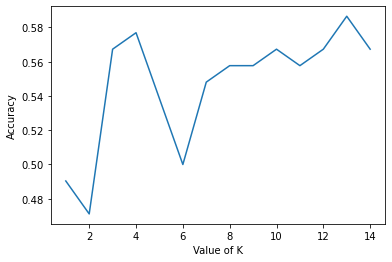

In [75]:
range_k = range(1,15)

scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train_scaled, y_train)
   y_pred = classifier.predict(X_test_scaled)
   
   scores_list.append(metrics.accuracy_score(y_test,y_pred))

print (scores_list)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

#k=13 results in the highest accuracy of around 58.65%

# 14

In [76]:
Auto = load_data('Auto')
Auto.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
391,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


# (a)

In [77]:
median_mileage=Auto['mpg'].median()
print(median_mileage)   

22.75


In [78]:
Auto['mpg01'] = [1 if x>median_mileage else 0 for x in Auto['mpg']]
Auto.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1
391,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10,1


# (b)

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='year', ylabel='mpg'>,
        <AxesSubplot:xlabel='origin', ylabel='mpg'>,
        <AxesSubplot:xlabel='mpg01', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='horsepower', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>,
        <AxesSubplot:xlabel='year', ylabel='cylinders'>,
        <AxesSubplot:xlabel='origin', ylabel='cylinders'>,
        <AxesSubplot:xl

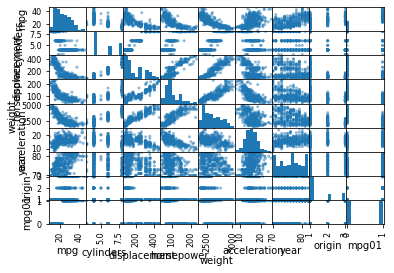

In [79]:
pd.plotting.scatter_matrix(Auto)

In [80]:
#dropping name as it is a qualitative variable
#dropping cylinder and origin (as they are categorical variables with a small number of categories) from the scatterplot
small_auto_df=Auto[['mpg','year', 'acceleration','weight','displacement','horsepower','mpg01']].copy()
small_auto_df.head(5)

,mpg,year,acceleration,weight,displacement,horsepower,mpg01
0,18.0,70,12.0,3504,307.0,130,0
1,15.0,70,11.5,3693,350.0,165,0
2,18.0,70,11.0,3436,318.0,150,0
3,16.0,70,12.0,3433,304.0,150,0
4,17.0,70,10.5,3449,302.0,140,0


array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='year', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower', ylabel='mpg'>,
        <AxesSubplot:xlabel='mpg01', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='acceleration', ylabel='year'>,
        <AxesSubplot:xlabel='weight', ylabel='year'>,
        <AxesSubplot:xlabel='displacement', ylabel='year'>,
        <AxesSubplot:xlabel='horsepower', ylabel='year'>,
        <AxesSubplot:xlabel='mpg01', ylabel='year'>],
       [<AxesSubplot:xlabel='mpg', ylabel='acceleration'>,
        <AxesSubplot:xlabel='year', ylabel='acceleration'>,
        <AxesSubplot:xlabel='acceleration', ylabel='acceleration'>,
        <AxesSubplot:xlabel='weight', ylab

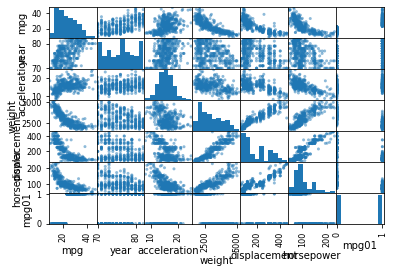

In [81]:
pd.plotting.scatter_matrix(small_auto_df)

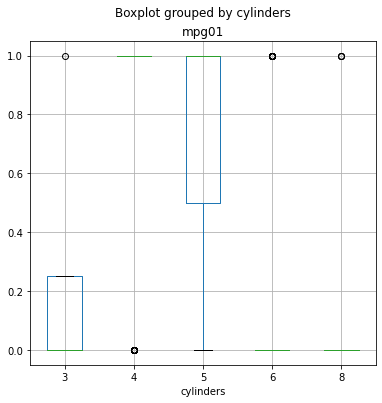

In [82]:
#import subplots from matplotlib.pyplot 
#plotting mpg vs cylinders as a boxplot and origin as the number of categories is small
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
Auto.boxplot('mpg01', by='cylinders', ax=ax);

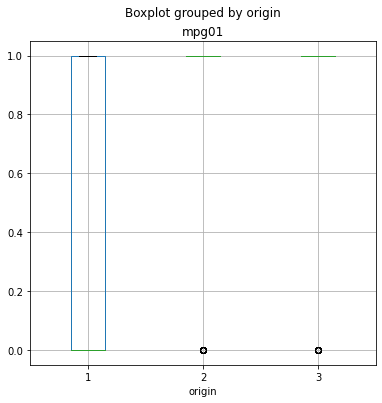

In [83]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
Auto.boxplot('mpg01', by='origin', ax=ax);

# (c)

In [84]:
#creating test set with 30 percent of the dataset
from sklearn.model_selection import train_test_split
#not using name
#splitting into features and labels, not using mpg as a predictor as it can be considered 'cheating' and year, origin and cylinders as well since there seems to be no relationship in the scatterplot
X = Auto[[ 'acceleration','weight','displacement','horsepower']]
y = Auto['mpg01']
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [85]:
X_train

,acceleration,weight,displacement,horsepower
391,19.4,2720,119.0,82
158,21.0,3907,231.0,110
141,14.5,2300,97.0,78
342,17.8,2065,97.0,67
66,11.0,4633,429.0,208
...,...,...,...,...
323,21.7,2085,90.0,48
192,17.6,3085,232.0,90
117,15.5,2158,116.0,75
47,14.5,3139,250.0,88


In [86]:
X_test

,acceleration,weight,displacement,horsepower
144,14.5,2125,90.0,75
280,17.3,2890,140.0,88
68,13.5,4456,350.0,160
372,14.7,2125,105.0,63
328,18.0,2145,97.0,67
...,...,...,...,...
289,15.0,3605,267.0,125
382,14.5,2585,156.0,92
22,17.5,2375,104.0,95
386,17.3,2950,151.0,90


In [87]:
y_train

391    1
158    0
141    1
342    1
66     0
      ..
323    1
192    0
117    1
47     0
172    0
Name: mpg01, Length: 274, dtype: int64

In [88]:
y_test

144    1
280    0
68     0
372    1
328    1
      ..
289    0
382    1
22     1
386    1
200    0
Name: mpg01, Length: 118, dtype: int64

In [89]:
#calculating proportion of test samples to cross check
print(118/(118+274))

0.3010204081632653


# (d)

In [90]:
#LDA model
lda = LDA(store_covariance=True)

In [91]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [92]:
lda_pred = lda.predict(X_test)

In [93]:
confusion_table(lda_pred, y_test)

Truth,0,1
Predicted,,
0,44,6
1,10,58


In [94]:
print("overall fraction of correct predictions using LDA=",(44+58)/(44+10+6+58))

overall fraction of correct predictions using LDA= 0.864406779661017


In [95]:
result = metrics.classification_report(y_test, lda_pred)
print("Classification Report:",result)

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.81      0.85        54
           1       0.85      0.91      0.88        64

    accuracy                           0.86       118
   macro avg       0.87      0.86      0.86       118
weighted avg       0.87      0.86      0.86       118



# (e)

In [96]:
qda = QDA(store_covariance=True)
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [97]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, y_test)

Truth,0,1
Predicted,,
0,45,8
1,9,56


In [98]:
print("overall fraction of correct predictions using QDA=",(45+56)/(44+10+6+58))

overall fraction of correct predictions using QDA= 0.8559322033898306


In [99]:
result = metrics.classification_report(y_test, qda_pred)
print("Classification Report:",result)

Classification Report:               precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.86      0.88      0.87        64

    accuracy                           0.86       118
   macro avg       0.86      0.85      0.85       118
weighted avg       0.86      0.86      0.86       118



# (f)

In [100]:
glm_train = sm.GLM(y_train,
                  X_train,
                  family=sm.families.Binomial())
results = glm_train.fit()

In [101]:
#confusion matrix for test data
probs = results.predict(exog=X_test)
labels = np.array([0]*118)
labels[probs >0.5] = 1
confusion_table(labels, y_test)

Truth,0,1
Predicted,,
0,44,7
1,10,57


In [102]:
print("overall fraction of correct predictions using logistic regression=",(44+57)/(44+10+6+58))

overall fraction of correct predictions using logistic regression= 0.8559322033898306


In [103]:
result = metrics.classification_report(y_test, labels)
print("Classification Report:",result)

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.81      0.84        54
           1       0.85      0.89      0.87        64

    accuracy                           0.86       118
   macro avg       0.86      0.85      0.85       118
weighted avg       0.86      0.86      0.86       118



# (h)

In [104]:
#scaling data as kNN is distance based

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(274, 4)
(118, 4)


test error for k= 1 is 11.016949152542377
test error for k= 2 is 12.711864406779661
test error for k= 3 is 11.864406779661019
test error for k= 4 is 10.169491525423723
test error for k= 5 is 11.864406779661019
test error for k= 6 is 11.864406779661019
test error for k= 7 is 11.864406779661019
test error for k= 8 is 11.016949152542377
test error for k= 9 is 11.864406779661019
test error for k= 10 is 11.864406779661019
test error for k= 11 is 11.864406779661019
test error for k= 12 is 11.864406779661019
test error for k= 13 is 11.864406779661019
test error for k= 14 is 11.864406779661019
test error for k= 15 is 11.864406779661019
[0.8898305084745762, 0.8728813559322034, 0.8813559322033898, 0.8983050847457628, 0.8813559322033898, 0.8813559322033898, 0.8813559322033898, 0.8898305084745762, 0.8813559322033898, 0.8813559322033898, 0.8813559322033898, 0.8813559322033898, 0.8813559322033898, 0.8813559322033898, 0.8813559322033898]


Text(0, 0.5, 'Accuracy')

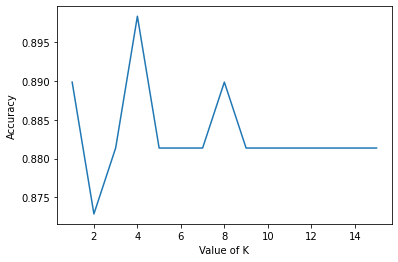

In [105]:
range_k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
test_errors=[]
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train_scaled, y_train)
   y_pred = classifier.predict(X_test_scaled)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
   print('test error for k=',k,'is',100*(1-metrics.accuracy_score(y_test,y_pred)))
print (scores_list)

%matplotlib inline
#import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")


In [106]:
#k=4 seems to give the best result

classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train_scaled, y_train)
y_pred4 = classifier.predict(X_test_scaled)

result = metrics.confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(result)

result1 = metrics.classification_report(y_test, y_pred4)
print("Classification Report:",result1)

Confusion Matrix:
[[47  7]
 [ 5 59]]
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.87      0.89        54
           1       0.89      0.92      0.91        64

    accuracy                           0.90       118
   macro avg       0.90      0.90      0.90       118
weighted avg       0.90      0.90      0.90       118



In [107]:
confusion_table(y_pred4, y_test)

Truth,0,1
Predicted,,
0,47,5
1,7,59
